In [1]:
import torch
from torchview import draw_graph
from model import ContextUnet
from constant import CONSTANT

torch.Size([200, 3, 28, 28])
torch.Size([200])
torch.Size([200, 1, 1, 1])
torch.Size([200])


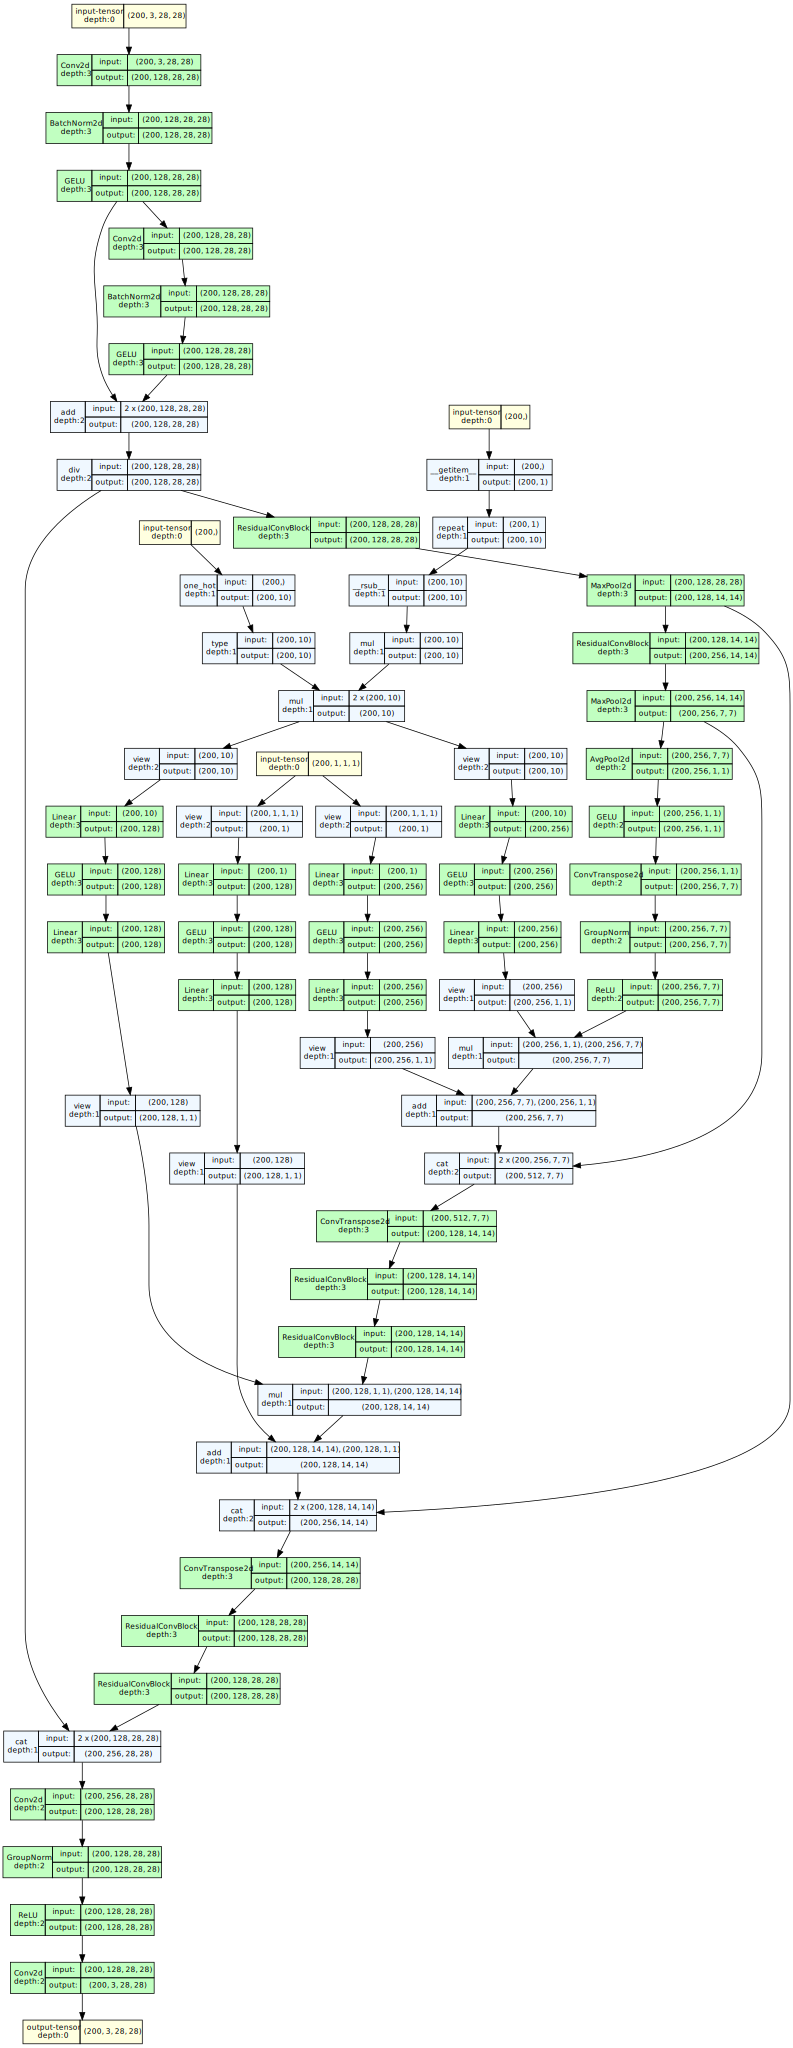

In [2]:
C = CONSTANT()
model = ContextUnet(in_channels=3, n_feat=C.n_feat, n_classes=C.n_classes)

# torch.Size([200, 3, 28, 28]) torch.Size([200]) torch.Size([200, 1, 1, 1]) torch.Size([200])

batch_size = 200
input_size = (
    (batch_size, 3, 28, 28),
    (batch_size,),
    (batch_size, 1, 1, 1),
    (batch_size,)
)
input_tensor = [torch.zeros(size) for size in input_size]
input_tensor[1] = (torch.arange(0, batch_size) % 10).long()
for i in input_tensor:
    print(i.shape)

# device='meta' -> no memory is consumed for visualization
# device='meta' will fucking cause one-hot encoding to throw error
model_graph = draw_graph(model, input_data=input_tensor, device='cpu', save_graph=True)
model_graph.visual_graph